# Vietnam Housing Data Preprocessing

This notebook demonstrates the complete data preprocessing pipeline for the Vietnam Housing dataset.

## Steps:
1. Load and explore raw data
2. Remove unnecessary columns
3. Handle duplicates
4. Handle missing values
5. Handle outliers
6. Data visualization
7. Save processed data

## 1. Import Libraries

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Add src to path
sys.path.append('../src')

from preprocessing import HousingDataPreprocessor
import utils

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Raw Data

**Note**: Download the dataset from Kaggle:
- Dataset: Vietnam Housing Dataset (Hanoi)
- Save to: `../data/vietnam_housing.csv`

If you don't have the dataset, this notebook will create sample data for demonstration.

In [3]:
# Initialize preprocessor
preprocessor = HousingDataPreprocessor()

# Try to load data
data_path = '../data/vietnam_housing.csv'

try:
    df = preprocessor.load_data(data_path)
    print("✓ Real data loaded successfully")
except FileNotFoundError:
    print("⚠️ Dataset not found. Creating sample data for demonstration...")
    
    # Create sample data
    np.random.seed(42)
    n_samples = 1000
    
    sample_data = {
        'Unnamed: 0': range(n_samples),
        'Ngày': pd.date_range('2023-01-01', periods=n_samples, freq='D'),
        'Địa chỉ': [f'Address {i}' for i in range(n_samples)],
        'Quận': np.random.choice(['Ba Đình', 'Hoàn Kiếm', 'Đống Đa', 'Hai Bà Trưng', 
                                  'Cầu Giấy', 'Thanh Xuân', 'Tây Hồ'], n_samples),
        'Huyện': np.random.choice(['Ba Đình', 'Hoàn Kiếm', 'Đống Đa', 'Hai Bà Trưng'], n_samples),
        'Giá': np.random.uniform(1e9, 20e9, n_samples),
        'Diện tích': np.random.uniform(30, 200, n_samples),
        'Giá/m²': np.random.uniform(20e6, 150e6, n_samples),
        'Số tầng': np.random.randint(1, 6, n_samples),
        'Số phòng ngủ': np.random.randint(1, 6, n_samples),
        'Dài': np.random.uniform(5, 20, n_samples),
        'Rộng': np.random.uniform(3, 15, n_samples),
        'Loại hình nhà ở': np.random.choice(['Nhà riêng', 'Nhà mặt phố', 'Biệt thự'], n_samples),
        'Giấy tờ pháp lý': np.random.choice(['Sổ đỏ/ Sổ hồng', 'Hợp đồng mua bán'], n_samples)
    }
    
    df = pd.DataFrame(sample_data)
    # Add some missing values
    df.loc[df.sample(50).index, 'Số tầng'] = np.nan
    df.loc[df.sample(30).index, 'Loại hình nhà ở'] = np.nan
    
    preprocessor.df = df
    print(f"✓ Sample data created: {df.shape}")

⚠️ Dataset not found. Creating sample data for demonstration...
✓ Sample data created: (1000, 14)


## 3. Exploratory Data Analysis (EDA)

In [4]:
# Display basic information
utils.print_data_info(df, "Raw Dataset Information")

                            Raw Dataset Information                             

Shape: 1000 rows × 14 columns

Column Information:
--------------------------------------------------------------------------------
         Column  Non-Null Count  Null Count          Dtype
     Unnamed: 0            1000           0          int64
           Ngày            1000           0 datetime64[ns]
        Địa chỉ            1000           0         object
           Quận            1000           0         object
          Huyện            1000           0         object
            Giá            1000           0        float64
      Diện tích            1000           0        float64
         Giá/m²            1000           0        float64
        Số tầng             950          50        float64
   Số phòng ngủ            1000           0          int32
            Dài            1000           0        float64
           Rộng            1000           0        float64
Loại hình nhà ở    

In [5]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Giá,Diện tích,Giá/m²,Số tầng,Số phòng ngủ,Dài,Rộng,Loại hình nhà ở,Giấy tờ pháp lý
0,0,2023-01-01,Address 0,Tây Hồ,Đống Đa,1.339605e+09,179.231113,5.524251e+07,2.0,4,5.287518,3.499728,Biệt thự,Hợp đồng mua bán
1,1,2023-01-02,Address 1,Hai Bà Trưng,Hoàn Kiếm,1.976673e+10,179.528915,9.769688e+07,1.0,2,11.479841,12.967629,Nhà mặt phố,Sổ đỏ/ Sổ hồng
2,2,2023-01-03,Address 2,Cầu Giấy,Đống Đa,9.127690e+09,177.998332,1.325924e+08,2.0,1,5.495179,9.855996,Nhà mặt phố,Hợp đồng mua bán
3,3,2023-01-04,Address 3,Tây Hồ,Ba Đình,8.302206e+09,70.595356,1.430754e+08,4.0,3,19.309051,10.289661,Nhà mặt phố,Sổ đỏ/ Sổ hồng
4,4,2023-01-05,Address 4,Đống Đa,Ba Đình,1.391330e+10,106.710689,3.376775e+07,4.0,2,8.148771,9.277896,NaN,Sổ đỏ/ Sổ hồng


In [6]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Unnamed: 0,Ngày,Giá,Diện tích,Giá/m²,Số tầng,Số phòng ngủ,Dài,Rộng
count,1000.000000,1000,1.000000e+03,1000.000000,1.000000e+03,950.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,2024-05-14 12:00:00,1.053028e+10,115.425429,8.431993e+07,2.981053,3.036000,12.414427,9.085910
min,0.000000,2023-01-01 00:00:00,1.061147e+09,30.001978,2.008494e+07,1.000000,1.000000,5.009413,3.034941
25%,249.750000,2023-09-07 18:00:00,5.536651e+09,76.479026,5.139495e+07,2.000000,2.000000,8.559903,6.178702
50%,499.500000,2024-05-14 12:00:00,1.073932e+10,115.104366,8.356273e+07,3.000000,3.000000,12.474785,9.165735
75%,749.250000,2025-01-19 06:00:00,1.525157e+10,158.222914,1.173418e+08,4.000000,4.000000,15.996032,12.172195
max,999.000000,2025-09-26 00:00:00,1.998886e+10,199.629545,1.499425e+08,5.000000,5.000000,19.997739,14.997019
std,288.819436,NaN,5.523107e+09,49.243372,3.743842e+07,1.414086,1.419408,4.368192,3.473264


In [7]:
# Check missing values
print("Missing Values:")
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Missing Values:


Số tầng            50
Loại hình nhà ở    30
dtype: int64

## 4. Data Cleaning Pipeline

### 4.1 Remove Unnecessary Columns

In [8]:
preprocessor.remove_unnecessary_columns()
print(f"Shape after removing columns: {preprocessor.df.shape}")

✓ Removed 1 unnecessary column(s): ['Unnamed: 0']
Shape after removing columns: (1000, 13)


### 4.2 Remove Duplicates

In [9]:
preprocessor.remove_duplicates()
print(f"Shape after removing duplicates: {preprocessor.df.shape}")

✓ Removed 0 duplicate row(s)
Shape after removing duplicates: (1000, 13)


### 4.3 Handle Missing Values

In [10]:
preprocessor.handle_missing_values()

print("\nMissing values after handling:")
missing_after = preprocessor.df.isnull().sum()
print(missing_after[missing_after > 0] if missing_after.any() else "No missing values!")

Handling missing values...
  - Filled 30 missing 'Loại hình nhà ở' values
  - Filled 50 missing 'Số tầng' values with 1
✓ Missing values handled successfully

Missing values after handling:
No missing values!


### 4.4 Handle Outliers

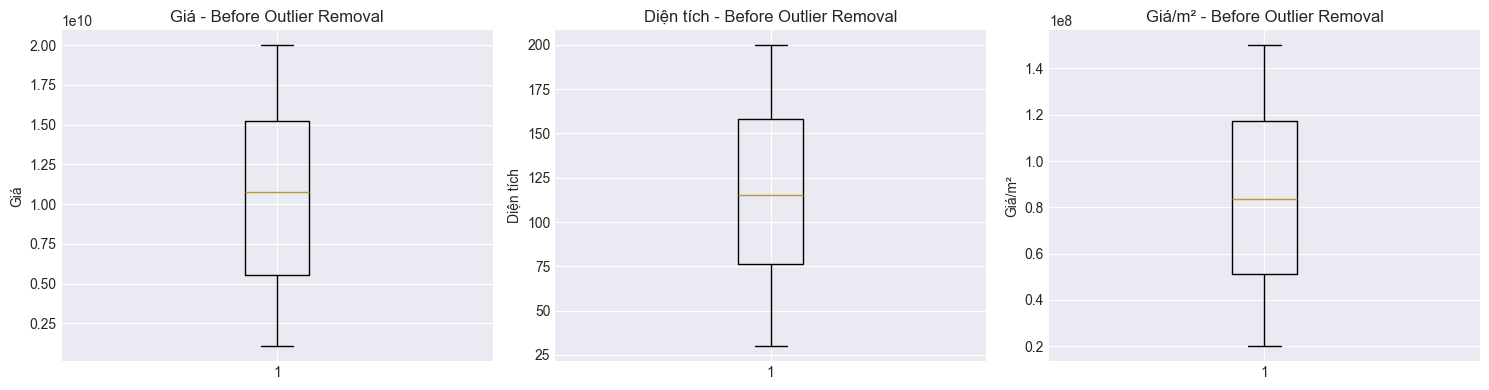

In [11]:
# Visualize outliers before removal
if 'Giá' in preprocessor.df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for idx, col in enumerate(['Giá', 'Diện tích', 'Giá/m²']):
        if col in preprocessor.df.columns:
            axes[idx].boxplot(preprocessor.df[col].dropna())
            axes[idx].set_title(f'{col} - Before Outlier Removal')
            axes[idx].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

In [12]:
# Remove outliers
preprocessor.handle_outliers(method='iqr', threshold=1.5)
print(f"Shape after removing outliers: {preprocessor.df.shape}")

Removing outliers using IQR method (threshold=1.5)...
  - Removed 0 outliers from 'Giá'
  - Removed 0 outliers from 'Diện tích'
  - Removed 0 outliers from 'Giá/m²'
✓ Total rows removed: 0
Shape after removing outliers: (1000, 13)


## 5. Data Visualization

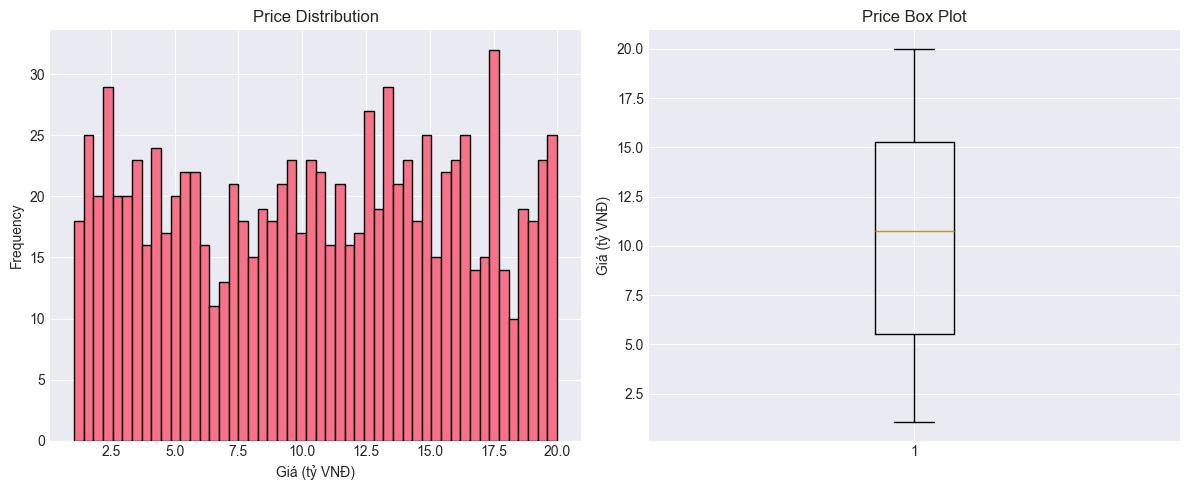

In [13]:
# Price distribution
if 'Giá' in preprocessor.df.columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(preprocessor.df['Giá'] / 1e9, bins=50, edgecolor='black')
    plt.xlabel('Giá (tỷ VNĐ)')
    plt.ylabel('Frequency')
    plt.title('Price Distribution')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(preprocessor.df['Giá'] / 1e9)
    plt.ylabel('Giá (tỷ VNĐ)')
    plt.title('Price Box Plot')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Price by district
if 'Quận' in preprocessor.df.columns and 'Giá' in preprocessor.df.columns:
    plt.figure(figsize=(12, 6))
    
    district_price = preprocessor.df.groupby('Quận')['Giá'].mean().sort_values(ascending=False) / 1e9
    district_price.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Quận')
    plt.ylabel('Giá trung bình (tỷ VNĐ)')
    plt.title('Average Price by District')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Correlation matrix for numerical features
numerical_cols = preprocessor.df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    plt.figure(figsize=(10, 8))
    correlation = preprocessor.df[numerical_cols].corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

## 6. Save Processed Data

In [ ]:
# Save the cleaned data (before encoding)
output_path = '../data/processed_housing_data.csv'

preprocessor.df_processed = preprocessor.df.copy()
preprocessor.save_processed_data(output_path)

print(f"\nFinal dataset shape: {preprocessor.df_processed.shape}")
print("\nData preprocessing completed successfully! ✓")

## Summary

In this notebook, we:
1. ✓ Loaded raw housing data
2. ✓ Removed unnecessary columns
3. ✓ Handled duplicate records
4. ✓ Handled missing values according to rules
5. ✓ Removed outliers using IQR method
6. ✓ Visualized data distributions and relationships
7. ✓ Saved processed data for model training

**Next Step**: Use `02_model_training.ipynb` to train and evaluate ML models.